In [1]:
from Packaged.MDFwithpymatgen import *

In [2]:
from pymatgen.ext.matproj import MPRester
mpr = MPRester("NGpMC4M2qzg2ZpPEX")

Passivation Products: Fe2O3(s)
Corrosion Products: Fe(OH)3(aq)
pH: 5.1
Potential: 0.47
Max Driving Force (eV): -0.3411953354430719


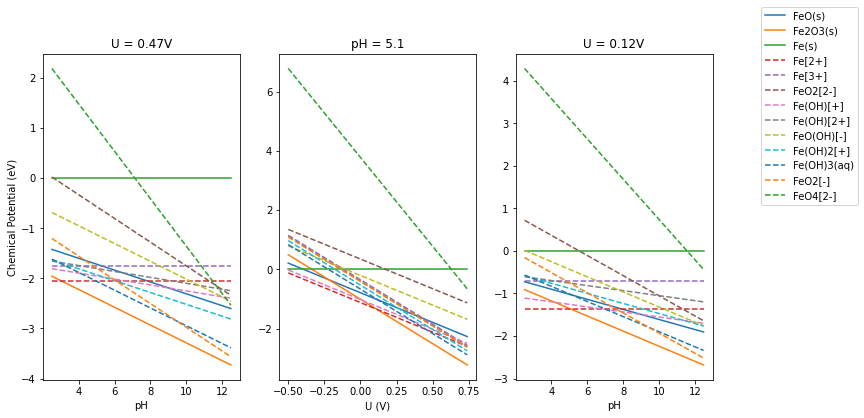

In [4]:
# example for a single element system with MP's filter:
METALS = ["Fe"]
# adjustment for multi-element: 
# METALS = ["Al", "Cr"]
# ADJUSTED_RATIO = [0.9, 0.1]
# METAL_RATIOS = {i: j for i, j in zip(METALS, ADJUSTED_RATIO)}
CONCEN = 1e-6
precision = 0.01
RANGE_PH = ([2.5, 12.5], precision)
RANGE_POTENTIAL = ([-0.5, 0.75], precision)
if check_metals(METALS):
    entries = mpr.get_pourbaix_entries(METALS)
    pbx = PourbaixDiagram(entries, conc_dict={met: CONCEN for met in METALS})
    # multi-element: pbx = PourbaixDiagram(entries, comp_dict = METAL_RATIOS, conc_dict={met: CONCEN for met in METALS})
    using_entries = pbx.all_entries
    if using_entries is not None:
        intermediates = driving_force_2D_helper(using_entries, RANGE_PH, RANGE_POTENTIAL, single = True, ox_req = False)
    if intermediates is not None:
        # does not zoom for single element since it usually doesn't have other participating products that are invisible
        # on the existing plots
        max_dr = driving_force_2D(intermediates, METALS, RANGE_PH, RANGE_POTENTIAL, plot = True, zoom = 1)
        print_dr_dict(max_dr)

In [5]:
# example for multi-element system with our filter
METALS = ["Fe", "Sc"]
CONCEN = 1e-6
# ratio of elements, must sum to 1
ADJUSTED_RATIO = [0.9, 0.1]
METAL_RATIOS = {i: j for i, j in zip(METALS, ADJUSTED_RATIO)}
precision = 0.01
RANGE_PH = ([2.5, 12.5], precision)
RANGE_POTENTIAL = ([-0.5, 0.75], precision)
# options for class_of_pourbaix: PourbaixDiagram, PourbaixDiagramMP, PourbaixDiagramAllPC, PourbaixDiagramBrute
class_of_pourbaix = PourbaixDiagram
if check_metals(METALS):
    using_entries = get_entries_with_my_filter(mpr, class_of_pourbaix, METALS, METAL_RATIOS, {i: CONCEN for i in METALS})
    if using_entries is not None:
        intermediates = driving_force_2D_helper(using_entries, RANGE_PH, RANGE_POTENTIAL, ox_req = False)
    if intermediates is not None:
        max_dr = driving_force_2D(intermediates, METALS, RANGE_PH, RANGE_POTENTIAL, plot = False, zoom = 1)
        print_dr_dict(max_dr)

OXIDATION STATE: FeO2(s) is not valid
OXIDATION STATE: FeH(s) is not valid
OXIDATION STATE: Fe2O5(s) is not valid
OXIDATION STATE: Fe3O(s) is not valid
OXIDATION STATE: Fe3H(s) is not valid
OXIDATION STATE: Fe4O13(s) is not valid
OXIDATION STATE: ScO(s) is not valid
OXIDATION STATE: ScO2(s) is not valid
OXIDATION STATE: ScO3(s) is not valid
OXIDATION STATE: ScH2(s) is not valid
OXIDATION STATE: ScFe3O8(s) is not valid
OXIDATION STATE: Sc2H5(s) is not valid
OXIDATION STATE: Sc16O15(s) is not valid
OXIDATION STATE: Sc20O19(s) is not valid
Did not check the following: ['ScFe3(s)', 'Sc29Fe6(s)', 'ScFe2(s)', 'Sc(s)', 'Fe(s)', 'Sc4Fe(s)']


  0%|          | 0/266 [00:00<?, ?it/s]

Passivation Products: Fe2O3(s) + Sc2O3(s)
Corrosion Products: Fe(OH)3(aq) + Sc(OH)[2+]
pH: 9.46
Potential: 0.64
Max Driving Force (eV): -0.3737738561283348


In [9]:
# example for multi-element system with our filter
METALS = ["Al", "Si", "Cu"]
CONCEN = 1e-6
# ratio of elements, must sum to 1
ADJUSTED_RATIO = [(1/3), (1/3), (1/3)]
METAL_RATIOS = {i: j for i, j in zip(METALS, ADJUSTED_RATIO)}
precision = 0.01
RANGE_PH = ([2.5, 12.5], precision)
RANGE_POTENTIAL = ([-0.5, 0.75], precision)
# RANGE_PH = ([-2, 16], precision)
# RANGE_POTENTIAL = ([-2, 2], precision)
# options for class_of_pourbaix: PourbaixDiagram, PourbaixDiagramMP, PourbaixDiagramAllPC, PourbaixDiagramBrute
class_of_pourbaix = PourbaixDiagram
if check_metals(METALS):
    using_entries = get_entries_with_my_filter(mpr, class_of_pourbaix, METALS, METAL_RATIOS, {i: CONCEN for i in METALS})
    if using_entries is not None:
        intermediates = driving_force_2D_helper(using_entries, RANGE_PH, RANGE_POTENTIAL, ox_req = False)
    if intermediates is not None:
        max_dr = driving_force_2D(intermediates, METALS, RANGE_PH, RANGE_POTENTIAL, plot = False, zoom = 1)
        print_dr_dict(max_dr)

  0%|          | 0/772 [00:00<?, ?it/s]

OXIDATION STATE: SiO(s) is not valid
OXIDATION STATE: SiO4(s) is not valid
OXIDATION STATE: SiH(s) is not valid
OXIDATION STATE: SiH2(s) is not valid
OXIDATION STATE: Si2O(s) is not valid
OXIDATION STATE: Si2O3(s) is not valid
OXIDATION STATE: Si2O5(s) is not valid
OXIDATION STATE: Si3O(s) is not valid
OXIDATION STATE: Si3O7(s) is not valid
OXIDATION STATE: Si3H(s) is not valid
OXIDATION STATE: Si4O9(s) is not valid
OXIDATION STATE: Si6O13(s) is not valid
OXIDATION STATE: Si17O37(s) is not valid
OXIDATION STATE: Si18O29(s) is not valid
OXIDATION STATE: Si48O107(s) is not valid
OXIDATION STATE: CuO2(s) is not valid
OXIDATION STATE: CuHO2(s) is not valid
OXIDATION STATE: CuSiO4(s) is not valid
OXIDATION STATE: Cu2O3(s) is not valid
OXIDATION STATE: Cu3O4(s) is not valid
OXIDATION STATE: Cu5O7(s) is not valid
OXIDATION STATE: Cu5(Si2O7)2(s) is not valid
OXIDATION STATE: Cu8O(s) is not valid
OXIDATION STATE: Cu9O13(s) is not valid
OXIDATION STATE: Cu64O(s) is not valid
OXIDATION STATE: AlO

  0%|          | 0/1462 [00:00<?, ?it/s]

There is no place in the given range where passivation is the most stable:
pH range: ([2.5, 12.5], 0.01) potential range: ([-0.5, 0.75], 0.01)


In [4]:
# using the intermediates from cell above to see the plots
max_dr = driving_force_2D(intermediates, METALS, RANGE_PH, RANGE_POTENTIAL, zoom = 1)
print_dr_dict(max_dr)

TypeError: cannot unpack non-iterable NoneType object

OXIDATION STATE: YO(s) is not valid
OXIDATION STATE: YO2(s) is not valid
OXIDATION STATE: YO3(s) is not valid
OXIDATION STATE: YH2(s) is not valid
OXIDATION STATE: Y3H(s) is not valid
OXIDATION STATE: Y3H2(s) is not valid
OXIDATION STATE: Y10H21(s) is not valid
Did not check the following: ['Y(s)']
Passivation Products: Y2O3(s)
Corrosion Products: Y(OH)[2+]
pH: 12.49
Potential: 0.04
Max Driving Force (eV): -0.24820289009281726


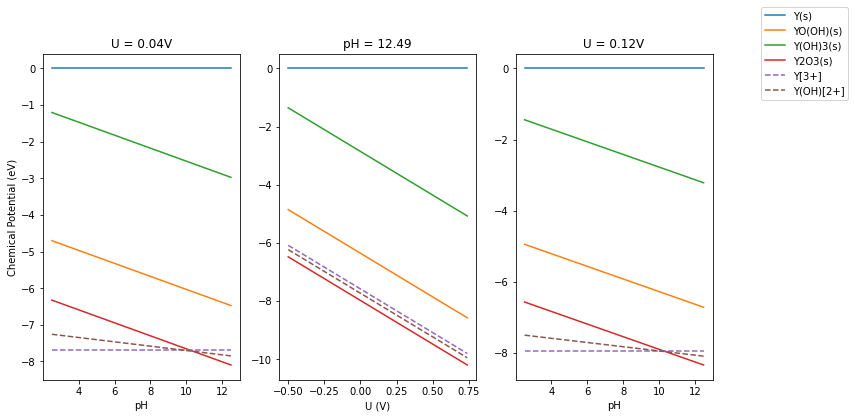

OXIDATION STATE: ZrO(s) is not valid
OXIDATION STATE: ZrH(s) is not valid
OXIDATION STATE: ZrH2(s) is not valid
OXIDATION STATE: ZrH3(s) is not valid
OXIDATION STATE: Zr2O(s) is not valid
OXIDATION STATE: Zr3O(s) is not valid
OXIDATION STATE: Zr4O(s) is not valid
OXIDATION STATE: Zr6O11(s) is not valid
OXIDATION STATE: Zr19O40(s) is not valid
OXIDATION STATE: Zr27O49(s) is not valid
Did not check the following: ['Zr(s)']
Passivation Products: ZrO2(s)
Corrosion Products: ZrO[2+]
pH: 12.49
Potential: -0.07
Max Driving Force (eV): -0.7626429555649823


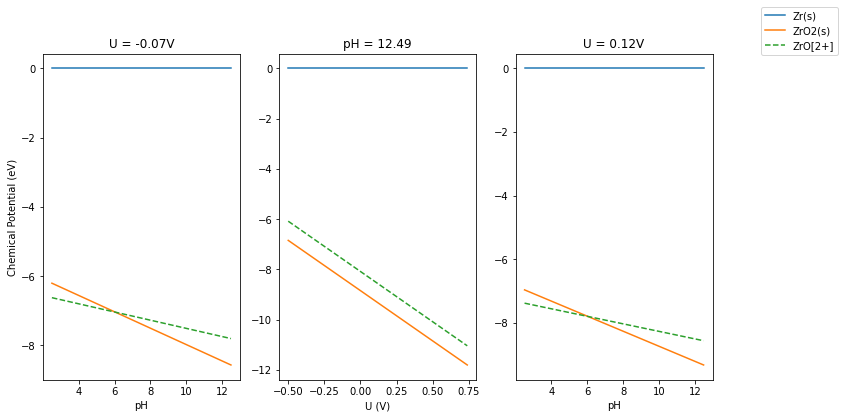

OXIDATION STATE: NbO3(s) is not valid
OXIDATION STATE: NbH(s) is not valid
Did not check the following: ['Nb(s)']
Passivation Products: Nb12O29(s)
Corrosion Products: Nb(OH)5(aq)
pH: 2.5
Potential: -0.5
Max Driving Force (eV): 0.01712585308789083
Max driving force displayed is positive: there is no place in the given range where passivation is the most stable.


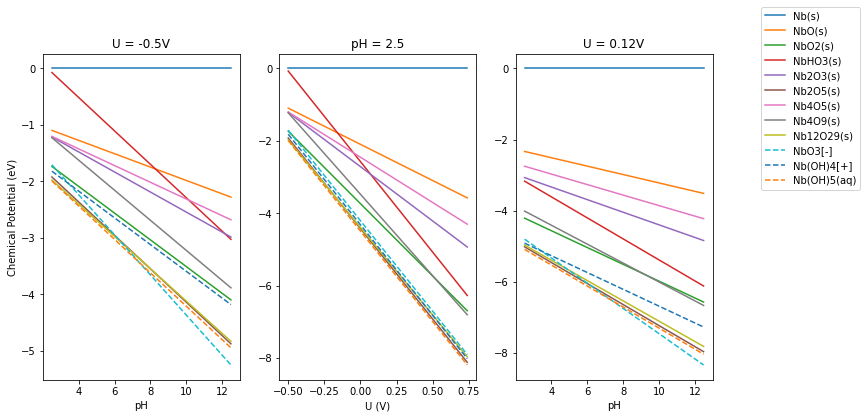

OXIDATION STATE: MoO4(s) is not valid
OXIDATION STATE: MoO5(s) is not valid
OXIDATION STATE: MoH(s) is not valid
OXIDATION STATE: MoHO3(s) is not valid
OXIDATION STATE: Mo2O(s) is not valid
OXIDATION STATE: Mo2O3(s) is not valid
OXIDATION STATE: Mo2O7(s) is not valid
OXIDATION STATE: Mo2HO6(s) is not valid
OXIDATION STATE: Mo3O10(s) is not valid
OXIDATION STATE: Mo3H(s) is not valid
OXIDATION STATE: Mo4O5(s) is not valid
Did not check the following: ['Mo(s)']
Passivation Products: MoO2(s)
Corrosion Products: Mo[3+]
pH: 6.89
Potential: -0.5
Max Driving Force (eV): -0.8724009071474856


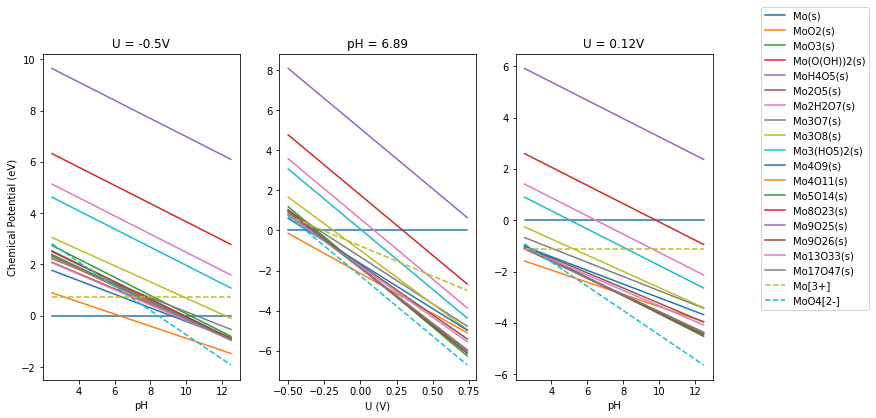

OXIDATION STATE: Tc3H(s) is not valid
Did not check the following: ['Tc(s)']
Passivation Products: TcO2(s)
Corrosion Products: Tc[2+]
pH: 10.71
Potential: -0.5
Max Driving Force (eV): -0.8824878826432803


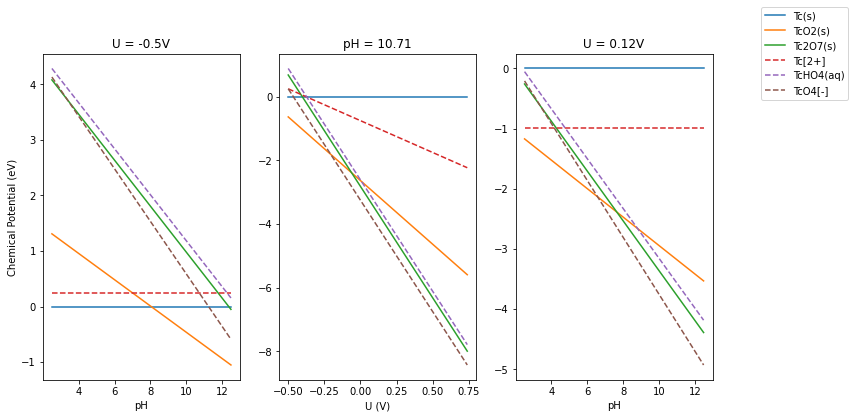

Did not check the following: ['Ru(s)']
Passivation Products: Ru(s)
Corrosion Products: H2RuO2[2+]
pH: 2.5
Potential: -0.5
Max Driving Force (eV): -2.936000193712097


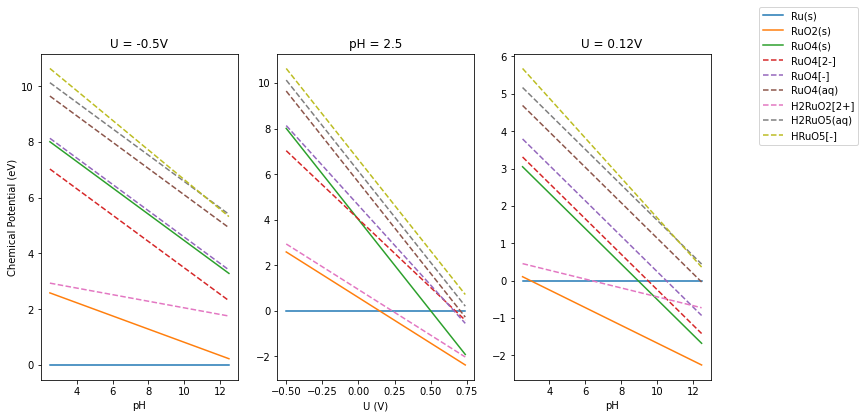

OXIDATION STATE: RhO3(s) is not valid
Did not check the following: ['Rh(s)']
Passivation Products: RhO2(s)
Corrosion Products: RhO[+]
pH: 12.49
Potential: 0.74
Max Driving Force (eV): -1.4436107027499965


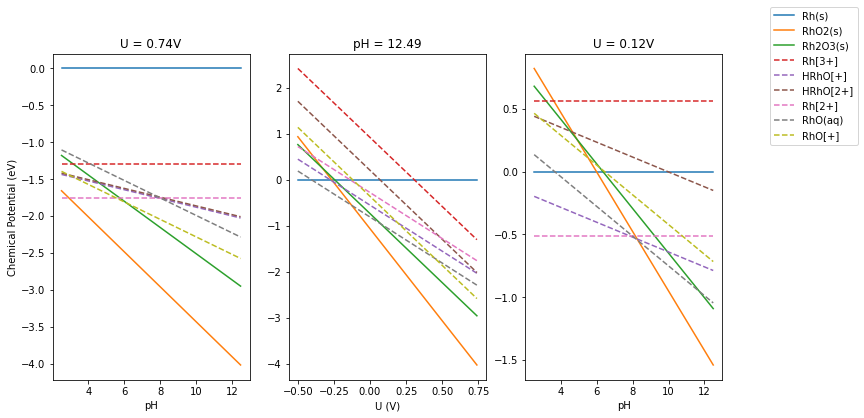

OXIDATION STATE: HPd(s) is not valid
OXIDATION STATE: HPd3(s) is not valid
OXIDATION STATE: H3Pd4(s) is not valid
Did not check the following: ['Pd(s)']
Passivation Products: PdO2(s)
Corrosion Products: Pd[2+]
pH: 12.49
Potential: 0.74
Max Driving Force (eV): -2.1627405033139713


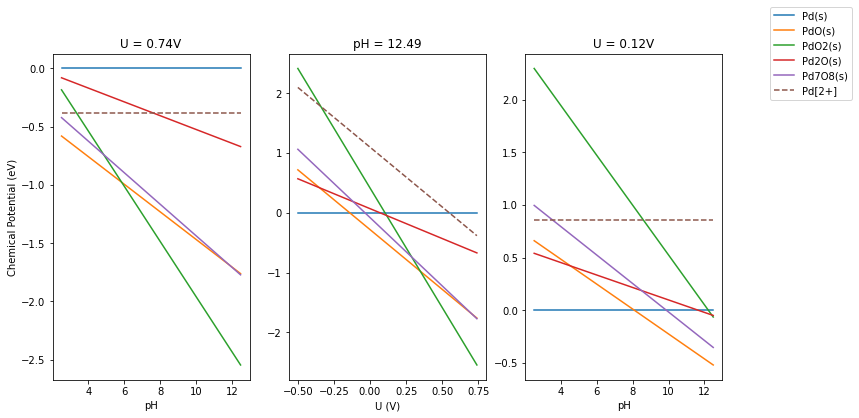

OXIDATION STATE: AgO2(s) is not valid
OXIDATION STATE: Ag3O(s) is not valid
Did not check the following: ['Ag(s)']
Passivation Products: Ag(s)
Corrosion Products: Ag[+]
pH: 2.5
Potential: -0.5
Max Driving Force (eV): -0.6758075663088096


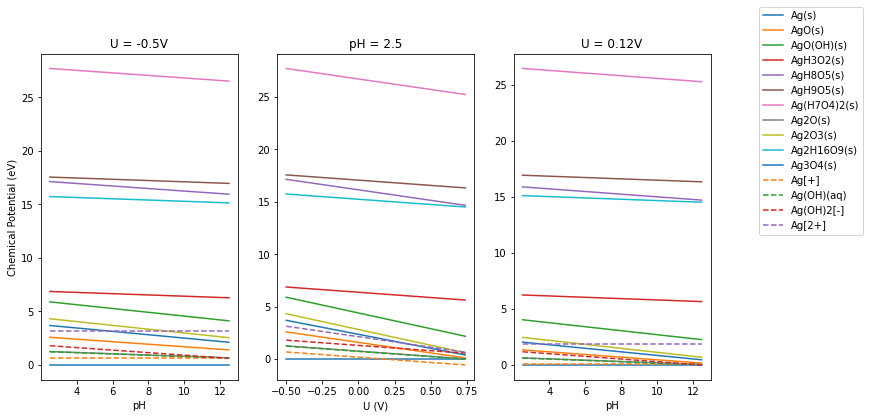

OXIDATION STATE: CdO2(s) is not valid
OXIDATION STATE: CdH(s) is not valid
Did not check the following: ['Cd(s)']
Passivation Products: CdO(s)
Corrosion Products: Cd(OH)2(aq)
pH: 9.79
Potential: 0.47
Max Driving Force (eV): 0.11286821555361293
Max driving force displayed is positive: there is no place in the given range where passivation is the most stable.


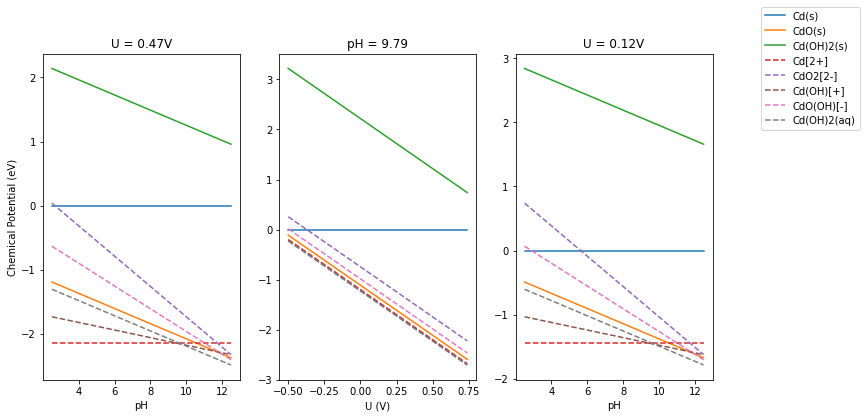

OXIDATION STATE: InO(s) is not valid
OXIDATION STATE: InO2(s) is not valid
OXIDATION STATE: InO3(s) is not valid
OXIDATION STATE: InH(s) is not valid
Did not check the following: ['In(s)']
Passivation Products: In2O3(s)
Corrosion Products: In(OH)2[+]
pH: 8.21
Potential: -0.01
Max Driving Force (eV): -0.22848194882837447


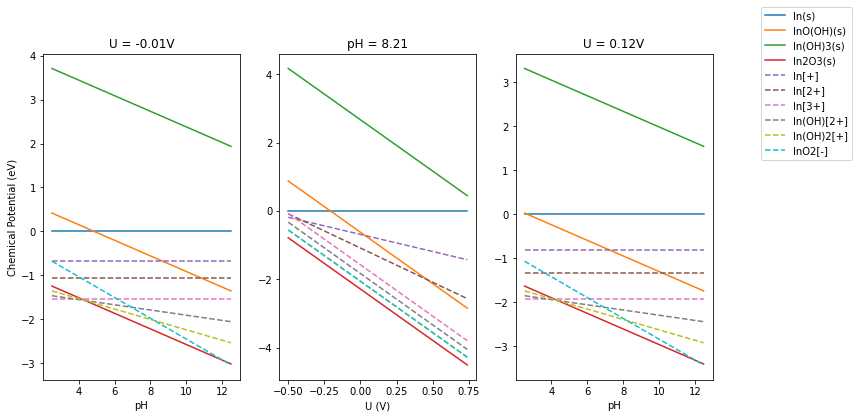

OXIDATION STATE: Sn2O(s) is not valid
OXIDATION STATE: Sn3O8(s) is not valid
Did not check the following: ['Sn(s)']
Passivation Products: SnO2(s)
Corrosion Products: SnO(OH)[+]
pH: 8.25
Potential: -0.03
Max Driving Force (eV): -0.5771844689494072


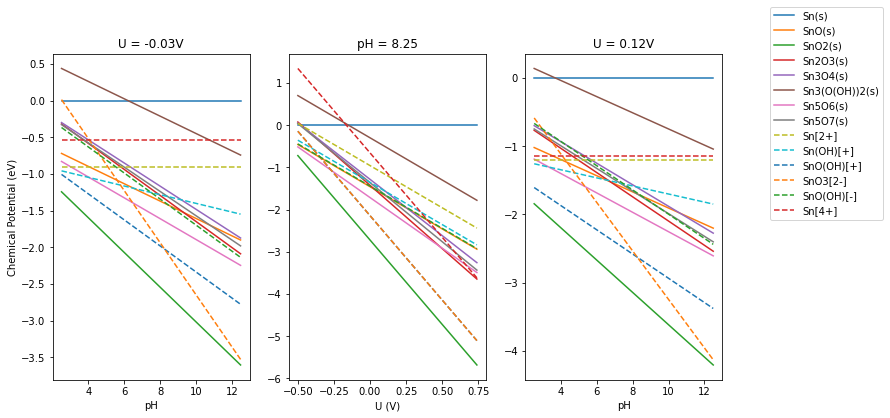

OXIDATION STATE: SbO3(s) is not valid
OXIDATION STATE: SbO4(s) is not valid
OXIDATION STATE: Sb2O7(s) is not valid
OXIDATION STATE: Sb3O8(s) is not valid
OXIDATION STATE: Sb3O14(s) is not valid
OXIDATION STATE: Sb5O14(s) is not valid
Did not check the following: ['Sb(s)']
Passivation Products: Sb2O5(s)
Corrosion Products: SbO2[-]
pH: 12.49
Potential: 0.74
Max Driving Force (eV): -1.5898718430662626


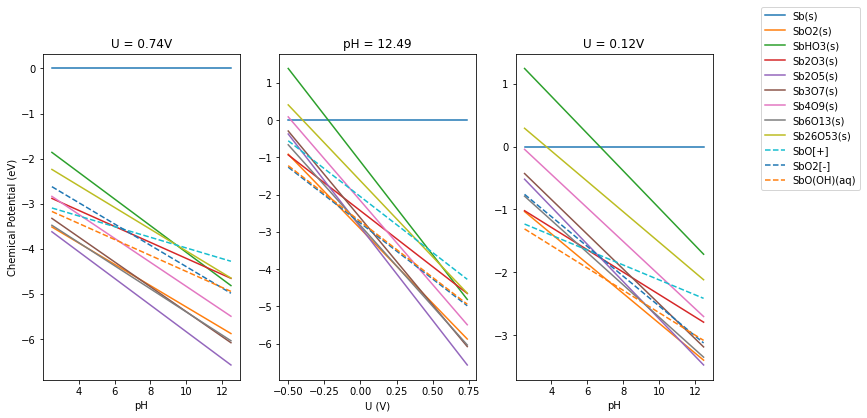

OXIDATION STATE: TeO4(s) is not valid
OXIDATION STATE: TeO6(s) is not valid
OXIDATION STATE: TeHO3(s) is not valid
OXIDATION STATE: TeH5O6(s) is not valid
Did not check the following: ['Te(s)']
Passivation Products: Te(s)
Corrosion Products: TeH2(aq)
pH: 2.55
Potential: 0.0
Max Driving Force (eV): -0.37613081575000007


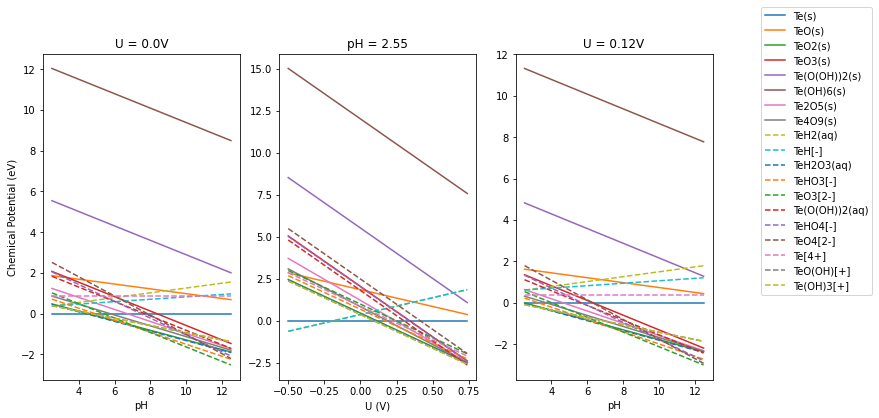

This metal cannot be included: I
I was skipped. 

This metal cannot be included: Xe
Xe was skipped. 

OXIDATION STATE: CsO2(s) is not valid
OXIDATION STATE: CsO3(s) is not valid
OXIDATION STATE: Cs2O2(s) is not valid
OXIDATION STATE: Cs2O3(s) is not valid
OXIDATION STATE: Cs3O(s) is not valid
OXIDATION STATE: Cs4O3(s) is not valid
OXIDATION STATE: Cs7O(s) is not valid
OXIDATION STATE: Cs11O3(s) is not valid
Did not check the following: ['Cs(s)']
Passivation Products: Cs2O(s)
Corrosion Products: Cs[+]
pH: 12.49
Potential: 0.71
Max Driving Force (eV): 2.168478434305885
Max driving force displayed is positive: there is no place in the given range where passivation is the most stable.


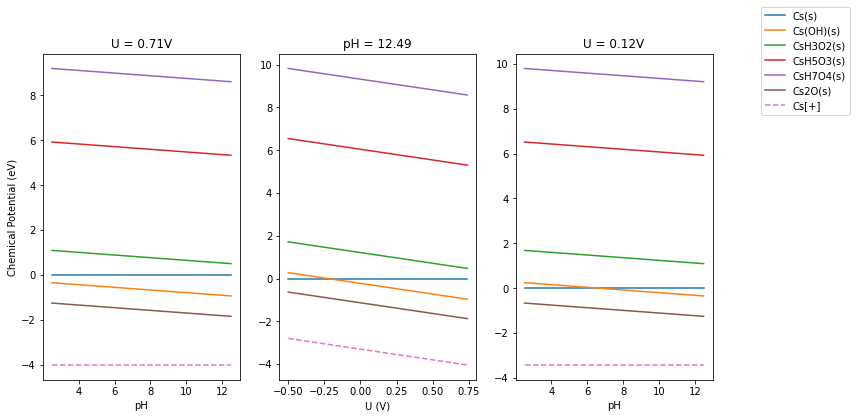

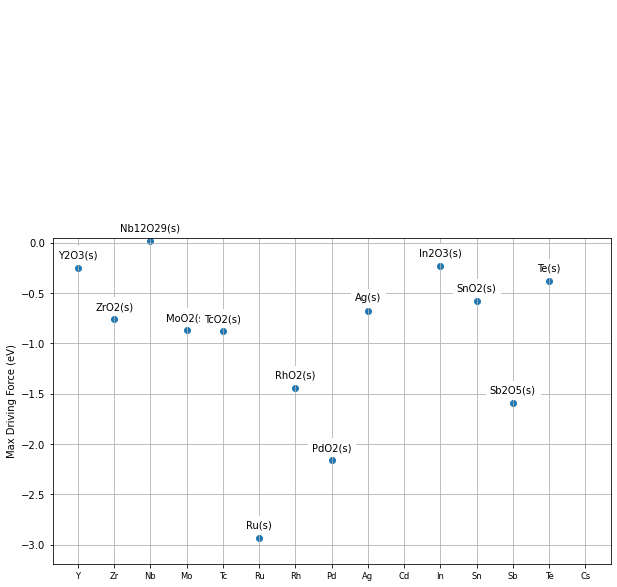

In [7]:
# MDF trends across periodic table example
# start metal num, end metal num, [pH range], [potential range], precision, concentration
# "myfilter" means using our filter
# if an element is not possible, it will be skipped + a message will be displayed for why
periodic_trend(mpr, 39, 55, [2.5, 12.5], [-0.5, 0.75], 0.01, 10**-6, myfilter = True)